# Table of Contents 

* [Imports & Functions](#imports-and-functions)
* [Feature Importance & Final Feature Selection](#feature-importance)
* [Random Forest - Unrestricted](#rf-unrestricted)
* [Random Forest - Restricted](#rf-restricted)

# Imports & Functions <a class="anchor" id="imports-and-functions"></a>

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, GridSearchCV, TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import matplotlib.dates as mdates

/Users/rg/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
def custom_mape(actual, forecast, epsilon=1e-10):
    """
    Custom MAPE calculation that handles zero and near-zero values.
    
    Parameters:
    - actual: array-like, actual values
    - forecast: array-like, forecasted values
    - epsilon: small constant to replace zero values
    
    Returns:
    - mape: Mean Absolute Percentage Error
    """
    actual = np.array(actual)
    forecast = np.array(forecast)
    
    #Replacing zero values in actual with epsilon to avoid division by zero
    actual = np.where(actual == 0, epsilon, actual)
    
    return np.mean(np.abs((actual - forecast) / actual)) * 100

def adjusted_r2(r2, n, p):
    return 1 - (1 - r2) * ((n - 1) / (n - p - 1))

In [3]:
#Reading in training data 
X_train_front = pd.read_csv('X_train_front_log_transformed.csv')
y_train_front = pd.read_csv('y_train_front_log_transformed.csv')
X_train_second = pd.read_csv('X_train_second_log_transformed.csv')
y_train_second = pd.read_csv('y_train_second_log_transformed.csv')

In [4]:
#Reading in test data 
X_test_front = pd.read_csv('X_test_front_log_transformed.csv')
y_test_front = pd.read_csv('y_test_front_log_transformed.csv')
X_test_second = pd.read_csv('X_test_second_log_transformed.csv')
y_test_second = pd.read_csv('y_test_second_log_transformed.csv')

In [5]:
#Setting indices of X and y datasets

X_train_front.set_index('Date', inplace=True)
y_train_front.set_index('Date', inplace=True)
X_train_second.set_index('Date', inplace=True)
y_train_second.set_index('Date', inplace=True)

X_test_front.set_index('Date', inplace=True)
y_test_front.set_index('Date', inplace=True)
X_test_second.set_index('Date',inplace=True)
y_test_second.set_index('Date',inplace=True)

In [6]:
y_train_front_idx = y_train_front.copy()
y_test_front_idx = y_test_front.copy()

y_train_second_idx = y_train_second.copy()
y_test_second_idx = y_test_second.copy()

In [7]:
#Converting target df into 1-D array
y_train_front = y_train_front.values.ravel()
y_test_front = y_test_front.values.ravel()

y_train_second = y_train_second.values.ravel()
y_test_second = y_test_second.values.ravel()

# Feature Importance  <a class="anchor" id="feature-importance"></a>

## Random Forest on Full feature-set <a class="anchor" id="rf-full-set"></a>

### Front-month

Mean Absolute Error (MAE): 0.012266833948830073
Root Mean Squared Error (RMSE): 0.01628000443771012
Mean Absolute Percentage Error (MAPE): 0.25995266584319815
R-squared: 0.9676064508046754


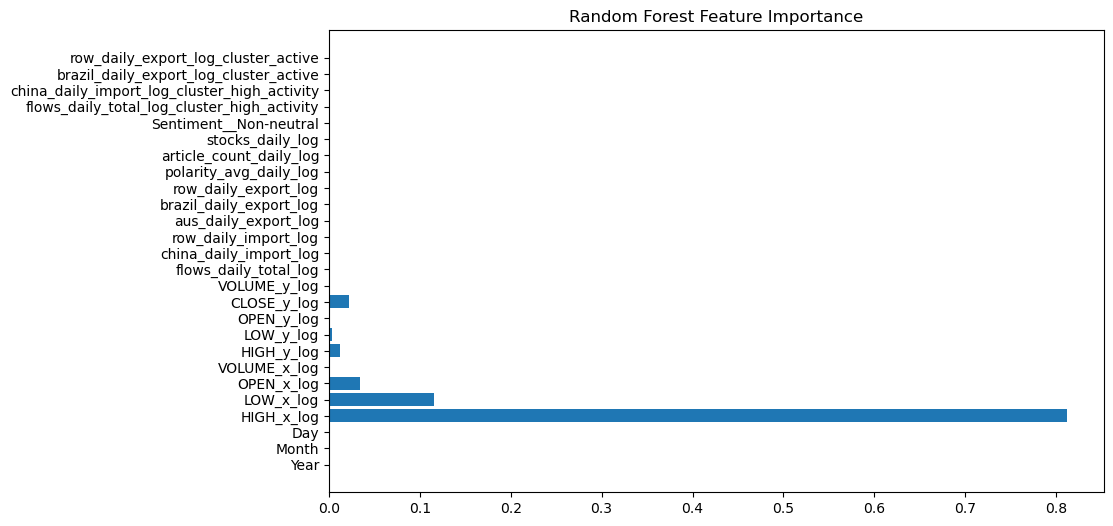

In [8]:
#Setting a global seed 
np.random.seed(42)


rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_front, y_train_front)

#Predictions on test
y_pred_front = rf_model.predict(X_test_front)

rf_mae_front = mean_absolute_error(y_test_front, y_pred_front)
rf_rmse_front = np.sqrt(mean_squared_error(y_test_front, y_pred_front))
rf_mape_front =  custom_mape(y_test_front, y_pred_front)
rf_r2_front = r2_score(y_test_front, y_pred_front)

print(f'Mean Absolute Error (MAE): {rf_mae_front}')
print(f'Root Mean Squared Error (RMSE): {rf_rmse_front}')
print(f'Mean Absolute Percentage Error (MAPE): {rf_mape_front}')
print(f'R-squared: {rf_r2_front}')

#Feature importances
rf_feature_importance_front = rf_model.feature_importances_
rf_features_front = X_train_front.columns

plt.figure(figsize=(10, 6))
plt.barh(rf_features_front, rf_feature_importance_front)
plt.title(f'Random Forest Feature Importance')
plt.show()

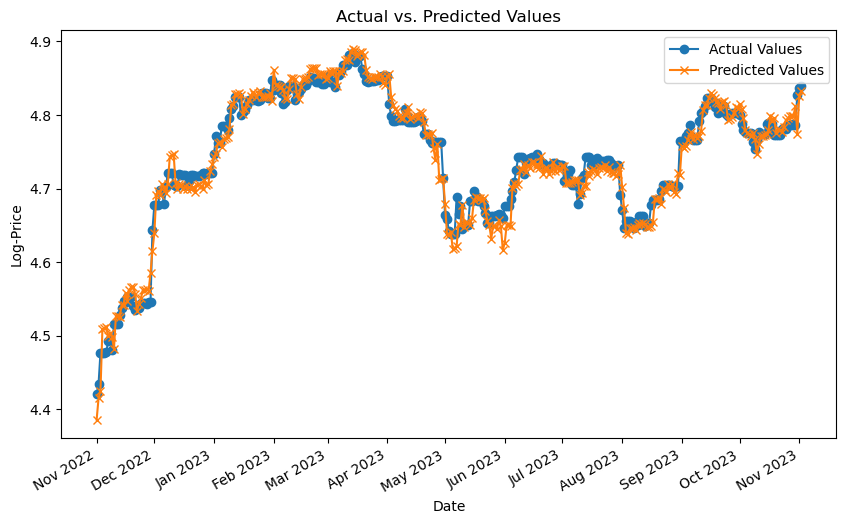

In [9]:
#Plotting actual vs. predicted values 

y_test_front_idx.index = pd.to_datetime(y_test_front_idx.index)

dates = y_test_front_idx.index
actual_values = y_test_front_idx['CLOSE_x']

plt.figure(figsize=(10, 6))
plt.plot(dates, actual_values, label='Actual Values', marker='o')
plt.plot(dates, y_pred_front, label='Predicted Values', marker='x')

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))


plt.xlabel('Date')
plt.ylabel('Log-Price')
plt.title('Actual vs. Predicted Values')
plt.legend()  

plt.gcf().autofmt_xdate()

plt.show()

### Second-month 

Repeating for second-month dataset

Mean Absolute Error (MAE): 0.019728206682090917
Root Mean Squared Error (RMSE): 0.024762958047524604
Mean Absolute Percentage Error (MAPE): 0.4173435464685719
R-squared: 0.9261367784510742


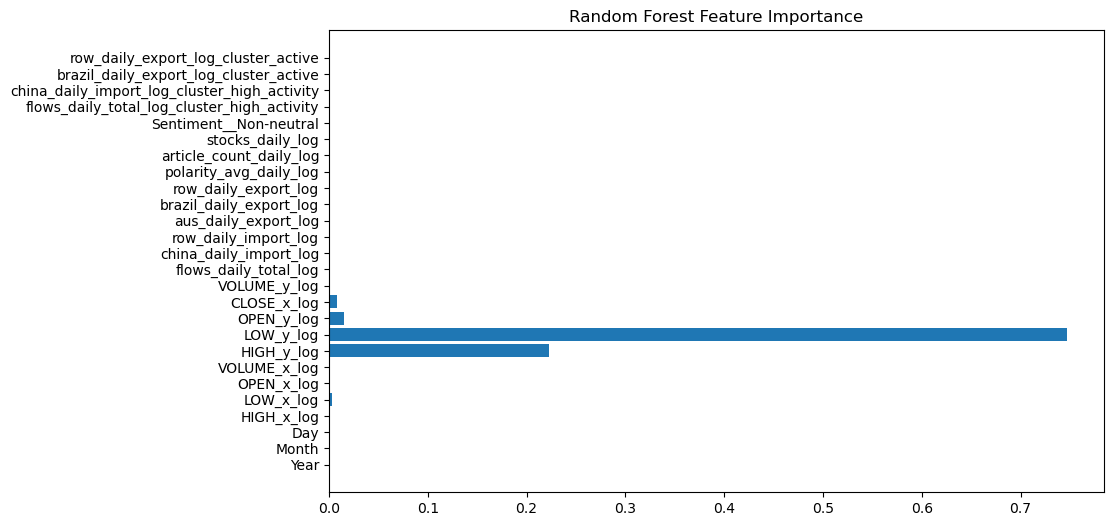

In [10]:
#Setting a global seed 
np.random.seed(42)


rf_model.fit(X_train_second, y_train_second)

y_pred_second = rf_model.predict(X_test_second)

rf_mae_second = mean_absolute_error(y_test_second, y_pred_second)
rf_rmse_second = np.sqrt(mean_squared_error(y_test_second, y_pred_second))
rf_mape_second =  custom_mape(y_test_second, y_pred_second)
rf_r2_second = r2_score(y_test_second, y_pred_second)

print(f'Mean Absolute Error (MAE): {rf_mae_second}')
print(f'Root Mean Squared Error (RMSE): {rf_rmse_second}')
print(f'Mean Absolute Percentage Error (MAPE): {rf_mape_second}')
print(f'R-squared: {rf_r2_second}')

rf_feature_importance_second = rf_model.feature_importances_
rf_features_second = X_train_second.columns

plt.figure(figsize=(10, 6))
plt.barh(rf_features_second, rf_feature_importance_second)
plt.title(f'Random Forest Feature Importance')
plt.show()

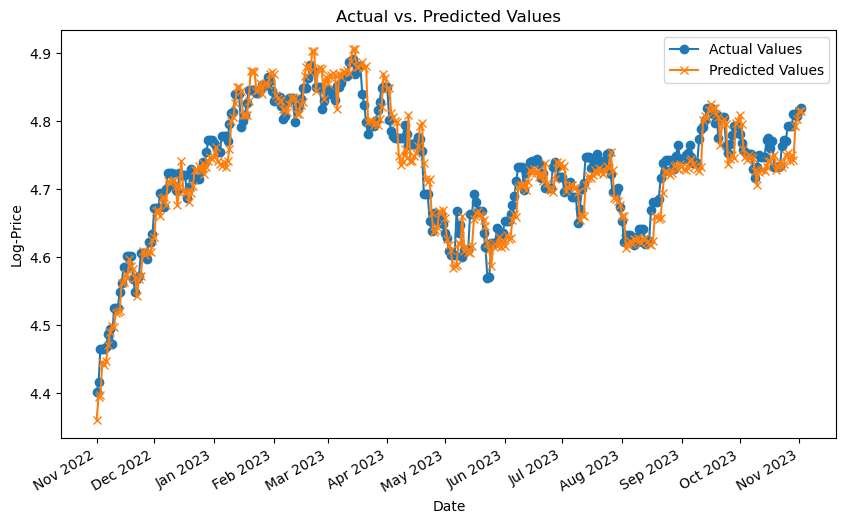

In [11]:
#Plotting actual vs. predicted values

y_test_second_idx.index = pd.to_datetime(y_test_second_idx.index)

dates = y_test_second_idx.index
actual_values = y_test_second_idx['CLOSE_y']

plt.figure(figsize=(10, 6))
plt.plot(dates, actual_values, label='Actual Values', marker='o')
plt.plot(dates, y_pred_second, label='Predicted Values', marker='x')

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))


plt.xlabel('Date')
plt.ylabel('Log-Price')
plt.title('Actual vs. Predicted Values')
plt.legend()  

plt.gcf().autofmt_xdate()

plt.show()

## Random Forest on Non-price features <a class="anchor" id="rf-non-price"></a>

In [12]:
non_price_cols = ['Year', 'Month', 'Day', 'flows_daily_total_log', 'china_daily_import_log',
       'row_daily_import_log', 'aus_daily_export_log',
       'brazil_daily_export_log', 'row_daily_export_log',
       'polarity_avg_daily_log', 'article_count_daily_log', 'stocks_daily_log',
       'Sentiment__Non-neutral', 'flows_daily_total_log_cluster_high_activity',
       'china_daily_import_log_cluster_high_activity',
       'brazil_daily_export_log_cluster_active',
       'row_daily_export_log_cluster_active']

### Front-month 

In [13]:
#Creating new dfs with non-price features 

X_train_front_exog_features = X_train_front[non_price_cols]
X_test_front_exog_features = X_test_front[non_price_cols]

Mean Absolute Error (MAE): 0.14757759694240852
Root Mean Squared Error (RMSE): 0.16917978344426768
Mean Absolute Percentage Error (MAPE): 3.103178822399395
R-squared: -2.498214419462769


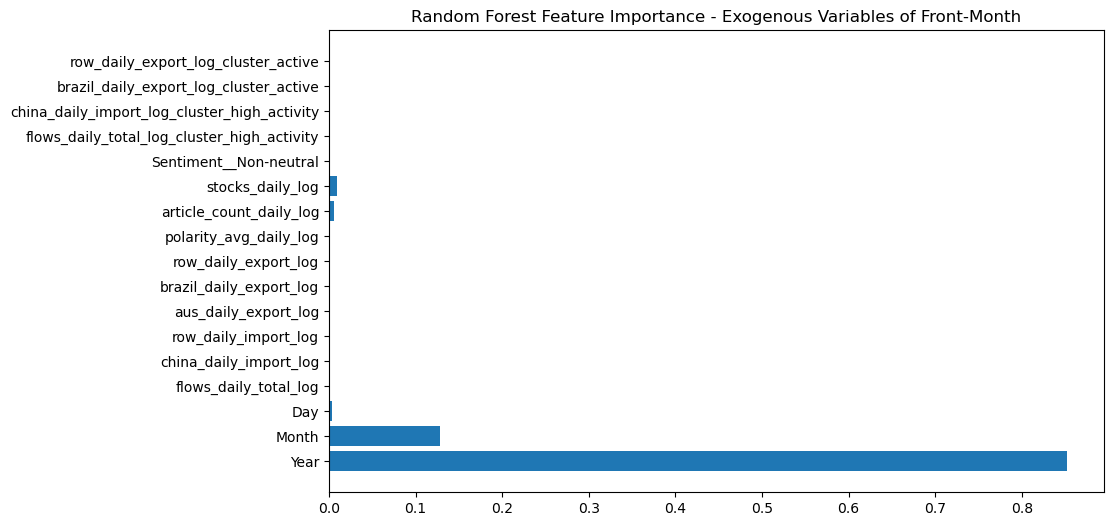

In [14]:
#Setting a global seed 
np.random.seed(42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_front_exog_features, y_train_front)

#Predicting on test
y_pred_front_exog = rf_model.predict(X_test_front_exog_features)

rf_mae_front_exog = mean_absolute_error(y_test_front, y_pred_front_exog)
rf_rmse_front_exog = np.sqrt(mean_squared_error(y_test_front, y_pred_front_exog))
rf_mape_front_exog =  custom_mape(y_test_front, y_pred_front_exog)
rf_r2_front_exog = r2_score(y_test_front, y_pred_front_exog)

print(f'Mean Absolute Error (MAE): {rf_mae_front_exog}')
print(f'Root Mean Squared Error (RMSE): {rf_rmse_front_exog}')
print(f'Mean Absolute Percentage Error (MAPE): {rf_mape_front_exog}')
print(f'R-squared: {rf_r2_front_exog}')


#Feature importances
rf_feature_importance_front_exog = rf_model.feature_importances_
rf_front_exog_features = X_train_front_exog_features.columns

plt.figure(figsize=(10, 6))
plt.barh(rf_front_exog_features, rf_feature_importance_front_exog)
plt.title(f'Random Forest Feature Importance - Exogenous Variables of Front-Month')
plt.show()

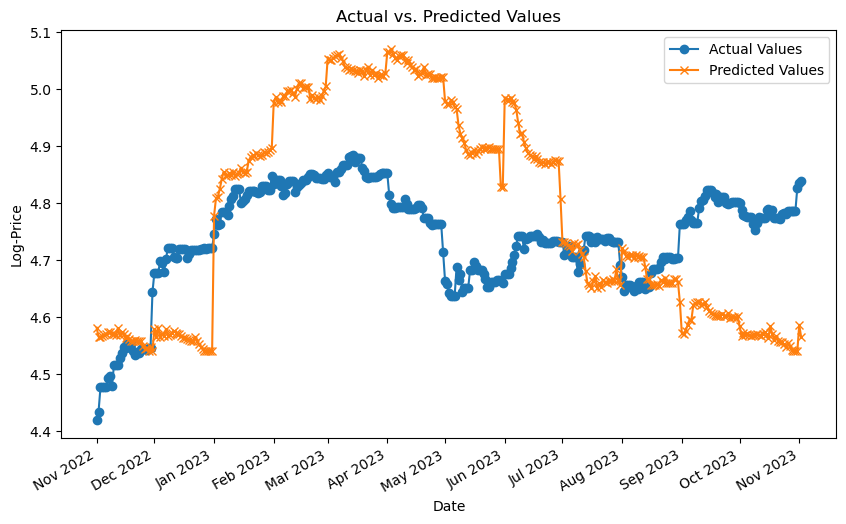

In [15]:
y_test_front_idx.index = pd.to_datetime(y_test_front_idx.index)

dates = y_test_front_idx.index
actual_values = y_test_front_idx['CLOSE_x']

plt.figure(figsize=(10, 6))
plt.plot(dates, actual_values, label='Actual Values', marker='o')
plt.plot(dates, y_pred_front_exog, label='Predicted Values', marker='x')

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))


plt.xlabel('Date')
plt.ylabel('Log-Price')
plt.title('Actual vs. Predicted Values')
plt.legend()  

plt.gcf().autofmt_xdate()

plt.show()

### Second-month 

Repeating steps for second-month dataset

In [16]:
#Creating new dfs with non-price features 

X_train_second_exog_features = X_train_second[non_price_cols]
X_test_second_exog_features = X_test_second[non_price_cols]

Mean Absolute Error (MAE): 0.16148589183385326
Root Mean Squared Error (RMSE): 0.1862514013701721
Mean Absolute Percentage Error (MAPE): 3.411903880996104
R-squared: -3.1785182173144078


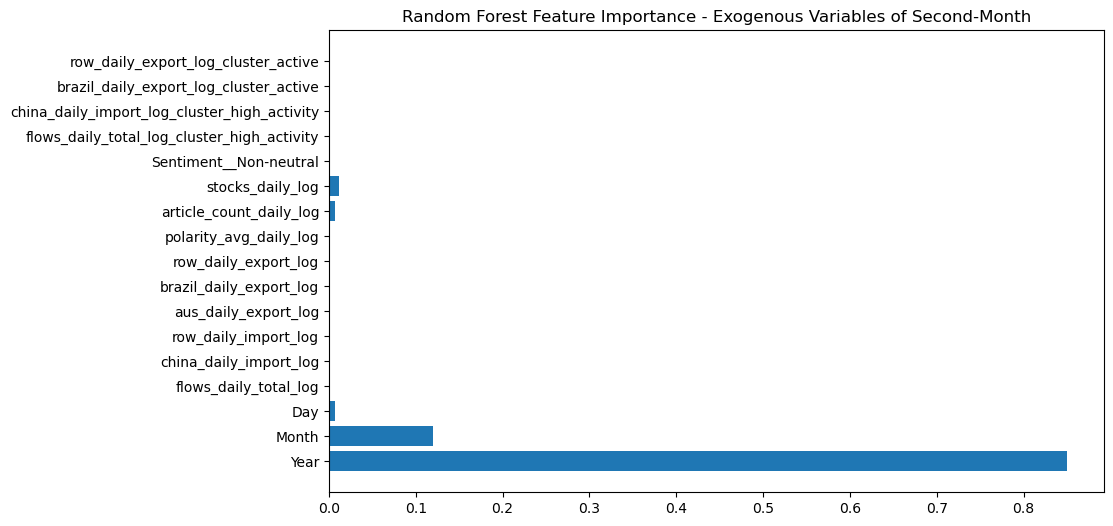

In [17]:
#Setting a global seed 
np.random.seed(42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_second_exog_features, y_train_second)

#Predicting on test 
y_pred_second_exog = rf_model.predict(X_test_second_exog_features)

rf_mae_second_exog = mean_absolute_error(y_test_second, y_pred_second_exog)
rf_rmse_second_exog = np.sqrt(mean_squared_error(y_test_second, y_pred_second_exog))
rf_mape_second_exog =  custom_mape(y_test_second, y_pred_second_exog)
rf_r2_second_exog = r2_score(y_test_second, y_pred_second_exog)

print(f'Mean Absolute Error (MAE): {rf_mae_second_exog}')
print(f'Root Mean Squared Error (RMSE): {rf_rmse_second_exog}')
print(f'Mean Absolute Percentage Error (MAPE): {rf_mape_second_exog}')
print(f'R-squared: {rf_r2_second_exog}')

#Feature importances
rf_feature_importance_second_exog = rf_model.feature_importances_
rf_second_exog_features = X_train_second_exog_features.columns

plt.figure(figsize=(10, 6))
plt.barh(rf_second_exog_features, rf_feature_importance_second_exog)
plt.title(f'Random Forest Feature Importance - Exogenous Variables of Second-Month')
plt.show()

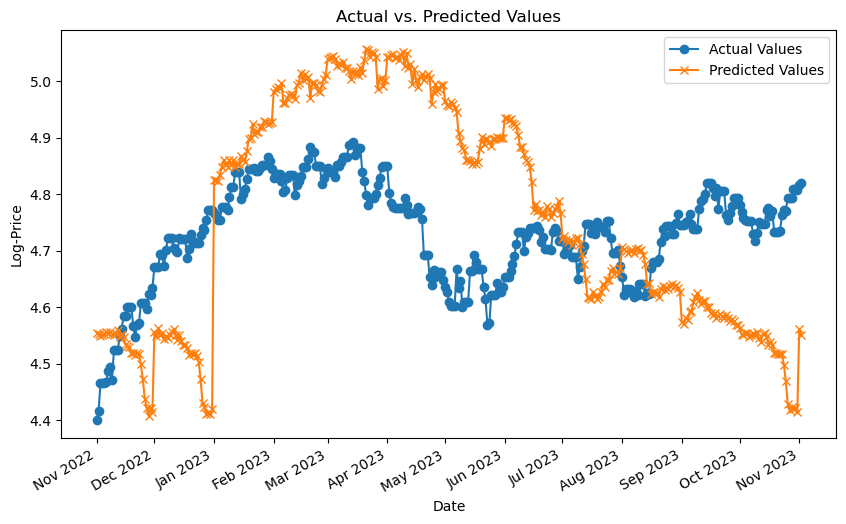

In [18]:
y_test_second_idx.index = pd.to_datetime(y_test_second_idx.index)

dates = y_test_second_idx.index
actual_values = y_test_second_idx['CLOSE_y']

plt.figure(figsize=(10, 6))
plt.plot(dates, actual_values, label='Actual Values', marker='o')
plt.plot(dates, y_pred_second_exog, label='Predicted Values', marker='x')

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))


plt.xlabel('Date')
plt.ylabel('Log-Price')
plt.title('Actual vs. Predicted Values')
plt.legend()  

plt.gcf().autofmt_xdate()

plt.show()

## Random Forest on Price features  <a class="anchor" id="rf-price"></a>

### Front-month 

In [19]:
price_cols_front = ['Year', 'Month', 'Day', 'HIGH_x_log', 'LOW_x_log', 'OPEN_x_log',
       'VOLUME_x_log', 'HIGH_y_log', 'LOW_y_log', 'OPEN_y_log', 'CLOSE_y_log',
       'VOLUME_y_log']

In [20]:
#Creating new dfs with non-price features 

X_train_front_price_features = X_train_front[price_cols_front]
X_test_front_price_features = X_test_front[price_cols_front]

Mean Absolute Error (MAE): 0.013442227375726291
Root Mean Squared Error (RMSE): 0.01715676536033178
Mean Absolute Percentage Error (MAPE): 0.2846250521168874
R-squared: 0.9640233832499283


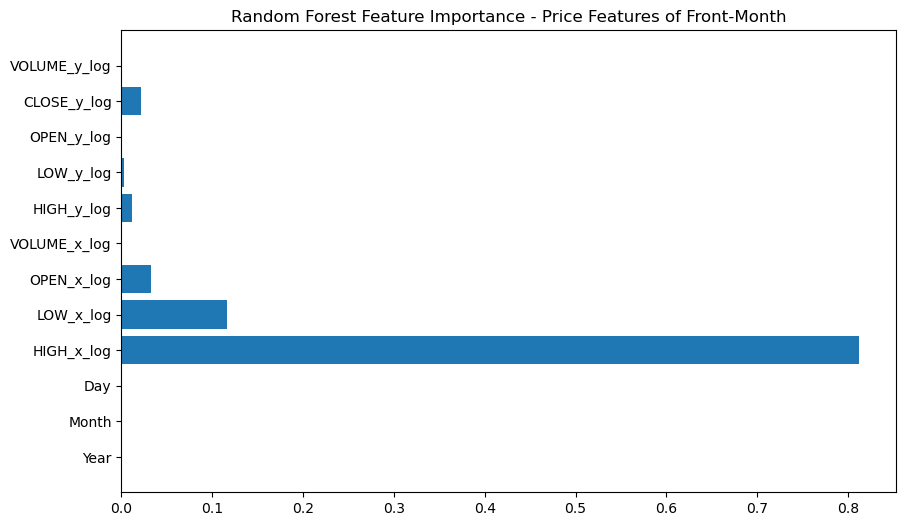

In [21]:
#Setting a global seed 
np.random.seed(42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_front_price_features, y_train_front)

#Predictions on test data
y_pred_front_price_features = rf_model.predict(X_test_front_price_features)

rf_mae_front_price_features = mean_absolute_error(y_test_front, y_pred_front_price_features)
rf_rmse_front_price_features = np.sqrt(mean_squared_error(y_test_front, y_pred_front_price_features))
rf_mape_front_price_features =  custom_mape(y_test_front, y_pred_front_price_features)
rf_r2_front_price_features = r2_score(y_test_front, y_pred_front_price_features)

print(f'Mean Absolute Error (MAE): {rf_mae_front_price_features}')
print(f'Root Mean Squared Error (RMSE): {rf_rmse_front_price_features}')
print(f'Mean Absolute Percentage Error (MAPE): {rf_mape_front_price_features}')
print(f'R-squared: {rf_r2_front_price_features}')

#Feature importances
rf_feature_importance_front_price_features = rf_model.feature_importances_
rf_front_price_features = X_train_front_price_features.columns

plt.figure(figsize=(10, 6))
plt.barh(rf_front_price_features, rf_feature_importance_front_price_features)
plt.title(f'Random Forest Feature Importance - Price Features of Front-Month')
plt.show()

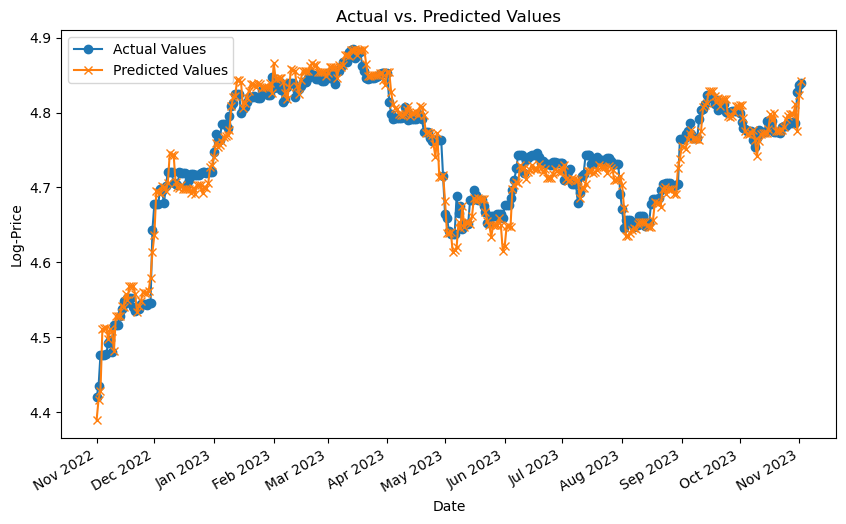

In [22]:
y_test_front_idx.index = pd.to_datetime(y_test_front_idx.index)

dates = y_test_front_idx.index
actual_values = y_test_front_idx['CLOSE_x']

plt.figure(figsize=(10, 6))
plt.plot(dates, actual_values, label='Actual Values', marker='o')
plt.plot(dates, y_pred_front_price_features, label='Predicted Values', marker='x')

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))


plt.xlabel('Date')
plt.ylabel('Log-Price')
plt.title('Actual vs. Predicted Values')
plt.legend()  

plt.gcf().autofmt_xdate()

plt.show()

### Second-month 

Repeating on second-month dataset

In [23]:
price_cols_second = ['Year', 'Month', 'Day', 'HIGH_x_log', 'LOW_x_log', 'OPEN_x_log',
       'VOLUME_x_log', 'HIGH_y_log', 'LOW_y_log', 'OPEN_y_log', 'CLOSE_x_log',
       'VOLUME_y_log']

In [24]:
#Creating new dfs with non-price features 

X_train_second_price_features = X_train_second[price_cols_second]
X_test_second_price_features = X_test_second[price_cols_second]

Mean Absolute Error (MAE): 0.025251789015351845
Root Mean Squared Error (RMSE): 0.034693846189305086
Mean Absolute Percentage Error (MAPE): 0.5365388899106766
R-squared: 0.8550133219868215


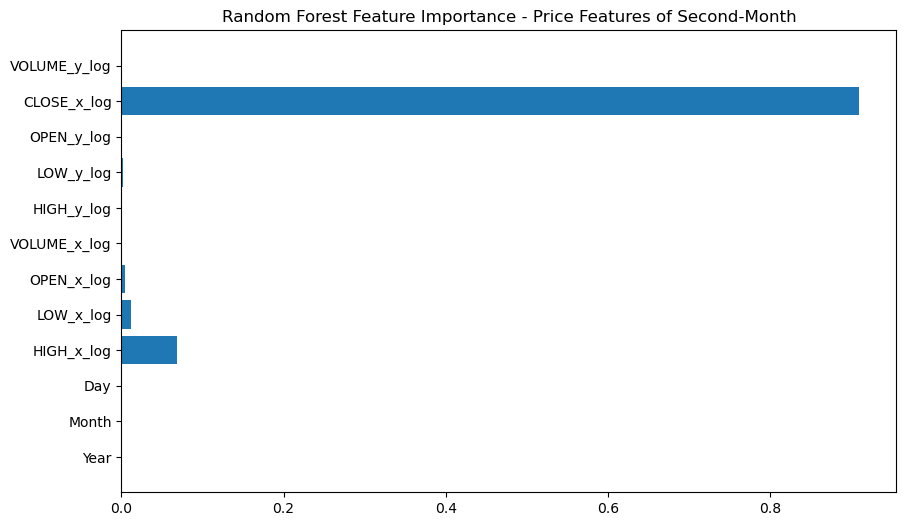

In [25]:
#Setting a global seed 
np.random.seed(42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_second_price_features, y_train_front)

# Predict and evaluate Random Forest
y_pred_second_price_features = rf_model.predict(X_test_second_price_features)

rf_mae_second_price_features = mean_absolute_error(y_test_second, y_pred_second_price_features)
rf_rmse_second_price_features = np.sqrt(mean_squared_error(y_test_second, y_pred_second_price_features))
rf_mape_second_price_features =  custom_mape(y_test_second, y_pred_second_price_features)
rf_r2_second_price_features = r2_score(y_test_second, y_pred_second_price_features)

print(f'Mean Absolute Error (MAE): {rf_mae_second_price_features}')
print(f'Root Mean Squared Error (RMSE): {rf_rmse_second_price_features}')
print(f'Mean Absolute Percentage Error (MAPE): {rf_mape_second_price_features}')
print(f'R-squared: {rf_r2_second_price_features}')

#Feature importance for Random Forest
rf_feature_importance_second_price_features = rf_model.feature_importances_
rf_second_price_features = X_train_second_price_features.columns

plt.figure(figsize=(10, 6))
plt.barh(rf_second_price_features, rf_feature_importance_second_price_features)
plt.title(f'Random Forest Feature Importance - Price Features of Second-Month')
plt.show()

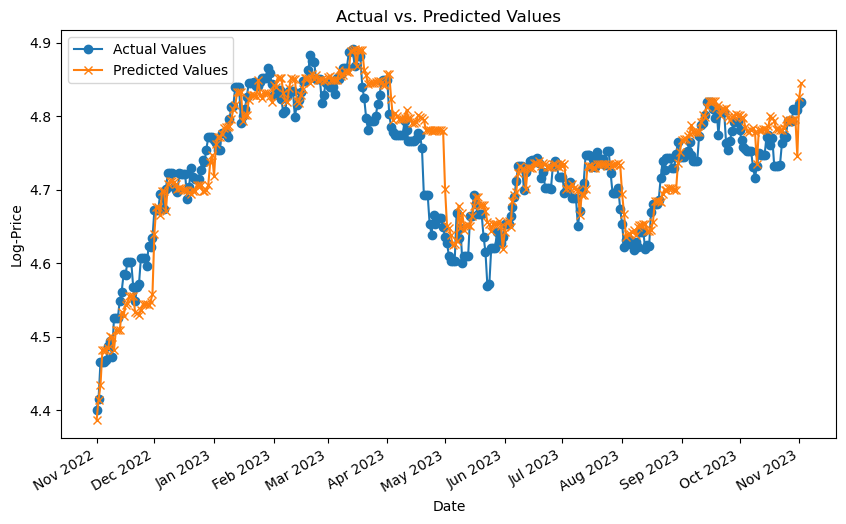

In [26]:
y_test_second_idx.index = pd.to_datetime(y_test_second_idx.index)

dates = y_test_second_idx.index
actual_values = y_test_second_idx['CLOSE_y']

plt.figure(figsize=(10, 6))
plt.plot(dates, actual_values, label='Actual Values', marker='o')
plt.plot(dates, y_pred_second_price_features, label='Predicted Values', marker='x')

#Formatting major ticks for visibility
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))


plt.xlabel('Date')
plt.ylabel('Log-Price')
plt.title('Actual vs. Predicted Values')
plt.legend()  

plt.gcf().autofmt_xdate()

plt.show()

## Averaging Feature importances <a class="anchor" id="avg-feature-importance"></a>

### Front-month

In [27]:
# List of all feature importance arrays and corresponding feature names
rf_importances = [rf_feature_importance_front, rf_feature_importance_front_exog, rf_feature_importance_front_price_features, ]
rf_feature_names = [rf_features_front, rf_front_exog_features, rf_front_price_features]

#Creating dict to store aggregated importances
feature_importance_dict = {}

#Aggregating importances
for importances, features in zip(rf_importances, rf_feature_names):
    normalized_importances = importances / np.sum(importances)
    for feature, importance in zip(features, normalized_importances):
        if feature in feature_importance_dict:
            feature_importance_dict[feature].append(importance)
        else:
            feature_importance_dict[feature] = [importance]

#Calculating average importance for each feature
average_importances_front = {feature: np.mean(importances) for feature, importances in feature_importance_dict.items()}

### Second-month

In [28]:
# List of all feature importance arrays and corresponding feature names
rf_importances_second = [rf_feature_importance_second, rf_feature_importance_second_exog, rf_feature_importance_second_price_features]
rf_features_second = [rf_features_second, rf_second_exog_features, rf_second_price_features]

#Creating dict to store aggregated importances
feature_importance_dict_second = {}

#Aggregating importances
for importances, features in zip(rf_importances_second, rf_features_second):
    normalized_importances = importances / np.sum(importances)
    for feature, importance in zip(features, normalized_importances):
        if feature in feature_importance_dict_second:
            feature_importance_dict_second[feature].append(importance)
        else:
            feature_importance_dict_second[feature] = [importance]

#Calculating average importance for each feature
average_importances_second = {feature: np.mean(importances) for feature, importances in feature_importance_dict_second.items()}

## Composite Importance Score  <a class="anchor" id="composite-imp-score"></a>

In [29]:
#Reading-in PCA Loadings
pca_loadings_front = pd.read_csv('pca_loadings_front.csv')
pca_loadings_second = pd.read_csv('pca_loadings_second.csv')

In [30]:
pca_loadings_front

,Unnamed: 0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,Year,0.301247,0.038453,0.033213,-0.004417,0.056899,-0.051237,0.063559,0.001512,0.199022,-0.092889,-0.041251
1,Month,-0.015214,-0.028724,0.033468,-0.106812,-0.029839,-0.150793,0.809990,-0.290136,-0.408372,0.138578,0.138519
2,Day,0.000122,-0.019788,-0.131750,-0.179226,-0.012951,0.641102,0.242989,-0.066188,0.429109,-0.191700,0.360018
3,HIGH_x_log,0.322257,0.041838,-0.025100,0.042742,0.049718,0.060877,-0.048307,0.004674,-0.124176,0.059424,0.051571
4,LOW_x_log,0.321562,0.042921,-0.027272,0.038915,0.051290,0.077708,-0.048960,0.002194,-0.125360,0.060633,0.049961
5,OPEN_x_log,0.321857,0.042417,-0.027424,0.041380,0.050332,0.070182,-0.047600,0.003607,-0.124545,0.059709,0.051104
6,VOLUME_x_log,0.112578,0.025463,0.070173,0.122633,-0.049581,-0.658995,-0.014762,0.090842,0.275113,-0.123688,0.359668
7,HIGH_y_log,0.323017,0.040811,-0.026503,0.043658,0.049458,0.064134,-0.040378,0.005082,-0.108358,0.050817,0.047429
8,LOW_y_log,0.322177,0.043478,-0.026030,0.040314,0.052499,0.069593,-0.046996,0.005036,-0.117626,0.054857,0.042796
9,OPEN_y_log,0.322534,0.042860,-0.027447,0.042561,0.051266,0.067110,-0.043460,0.005544,-0.113116,0.052325,0.045406


In [31]:
#Renaming columns in PCA loadings DataFrames
pca_loadings_front = pca_loadings_front.rename(columns={'Unnamed: 0': 'feature'})
pca_loadings_second = pca_loadings_second.rename(columns={'Unnamed: 0': 'feature'})

In [32]:
#Normalising Random Forest Importances 

#Front-month
avg_importances_front_normalized = pd.DataFrame(list(average_importances_front.items()), columns=['feature', 'importance'])
avg_importances_front_normalized['importance'] = avg_importances_front_normalized['importance'] / avg_importances_front_normalized['importance'].sum()
print(avg_importances_front_normalized)

#Second-month
avg_importances_second_normalized = pd.DataFrame(list(average_importances_second.items()), columns=['feature', 'importance'])
avg_importances_second_normalized['importance'] = avg_importances_second_normalized['importance'] / avg_importances_second_normalized['importance'].sum()
print(avg_importances_second_normalized)

                                         feature  importance
0                                           Year    0.212690
1                                          Month    0.031994
2                                            Day    0.000992
3                                     HIGH_x_log    0.608021
4                                      LOW_x_log    0.086951
5                                     OPEN_x_log    0.024867
6                                   VOLUME_x_log    0.000100
7                                     HIGH_y_log    0.008818
8                                      LOW_y_log    0.002108
9                                     OPEN_y_log    0.000648
10                                   CLOSE_y_log    0.016108
11                                  VOLUME_y_log    0.000101
12                         flows_daily_total_log    0.000092
13                        china_daily_import_log    0.000152
14                          row_daily_import_log    0.000137
15                      

In [33]:
#Combining PCA loadings and Random Forest importances 

#Initialising dataframe
combined_results_front = pd.DataFrame()

for i in pca_loadings_front.columns[1:]:
    component_loadings = pca_loadings_front[i].abs()
    component_importance = avg_importances_front_normalized.copy()
    component_importance['pca_loading'] = component_loadings.values
    component_importance['combined_score'] = (component_importance['importance'] * 
                                              component_importance['pca_loading'])
    combined_results_front = pd.concat([combined_results_front, component_importance], ignore_index=True)

#Aggregating combined scores 
final_scores_front = combined_results_front.groupby('feature')['combined_score'].sum().sort_values(ascending=False)
print(final_scores_front)


#Second-month

combined_results_second = pd.DataFrame()

for i in pca_loadings_second.columns[1:]:
    component_loadings = pca_loadings_second[i].abs()
    component_importance = avg_importances_second_normalized.copy()
    component_importance['pca_loading'] = component_loadings.values
    component_importance['combined_score'] = (component_importance['importance'] * 
                                              component_importance['pca_loading'])
    combined_results_second = pd.concat([combined_results_second, component_importance], ignore_index=True)

#Aggregating combined scores
final_scores_second = combined_results_second.groupby('feature')['combined_score'].sum().sort_values(ascending=False)
print(final_scores_second)

feature
HIGH_x_log                                      0.505074
Year                                            0.187954
LOW_x_log                                       0.073628
Month                                           0.068802
OPEN_x_log                                      0.020893
CLOSE_y_log                                     0.013060
HIGH_y_log                                      0.007051
stocks_daily_log                                0.006354
article_count_daily_log                         0.003360
Day                                             0.002256
LOW_y_log                                       0.001731
OPEN_y_log                                      0.000527
row_daily_import_log                            0.000260
polarity_avg_daily_log                          0.000251
VOLUME_x_log                                    0.000190
row_daily_export_log                            0.000183
aus_daily_export_log                            0.000172
brazil_daily_export_log

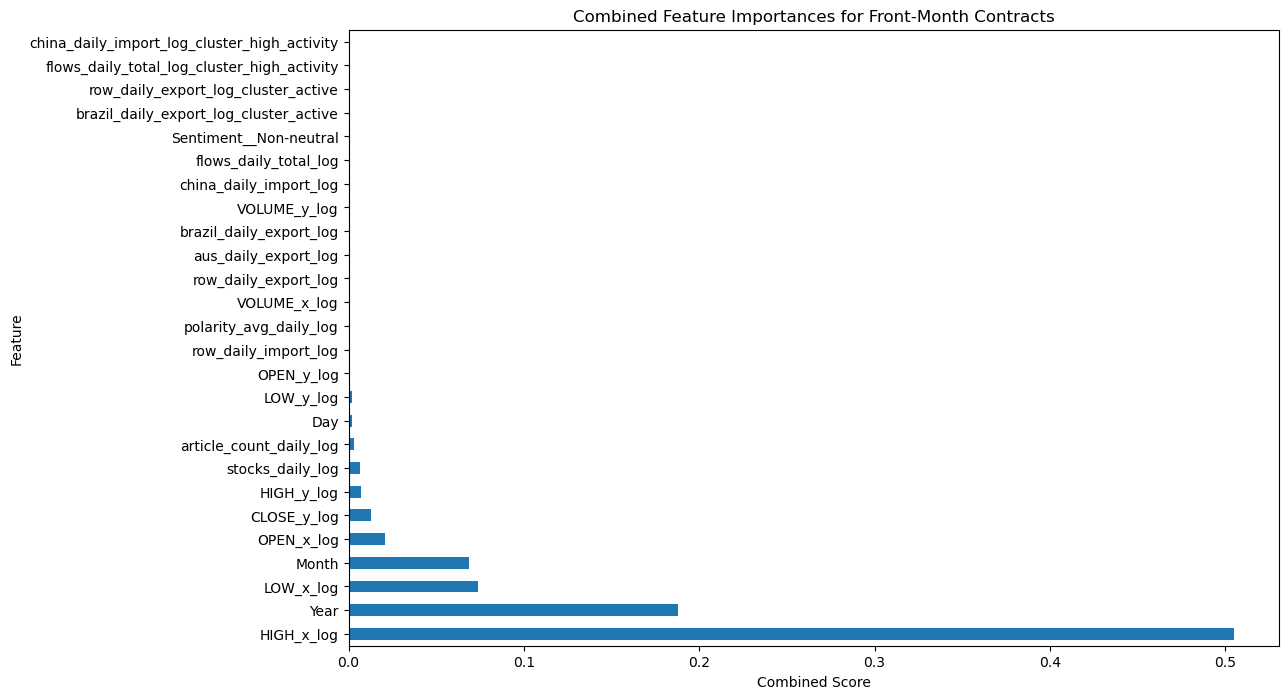

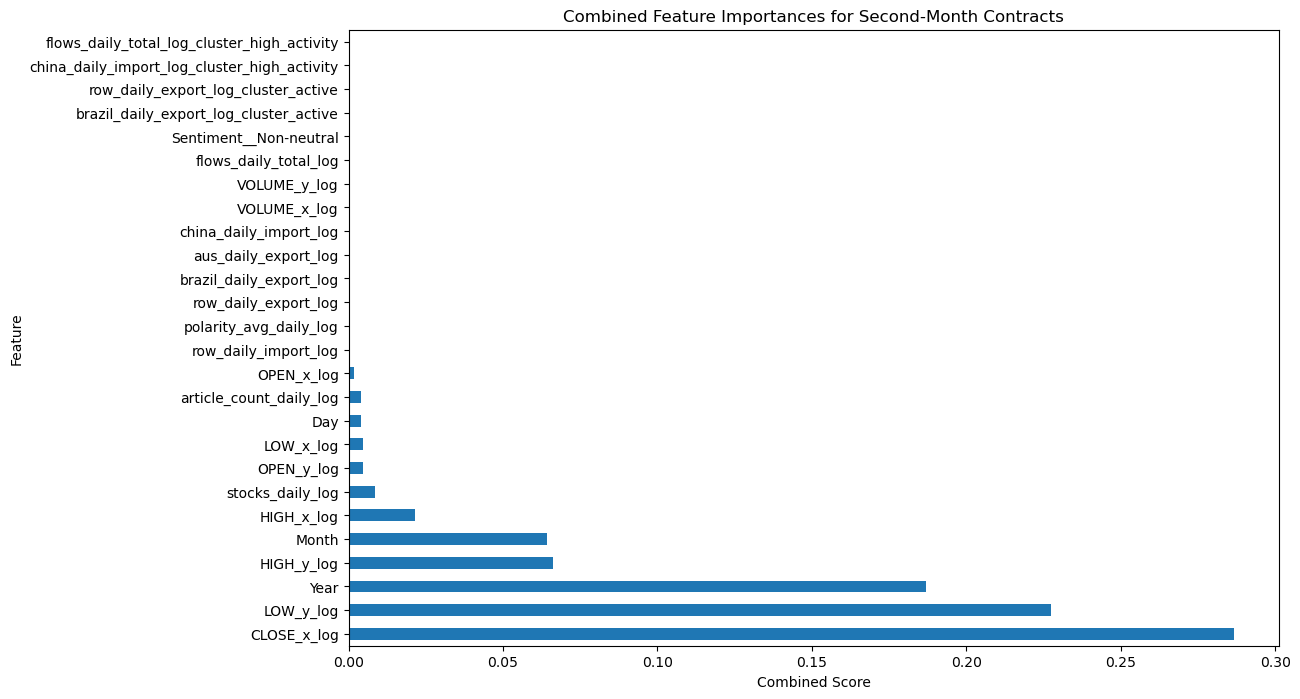

In [34]:
#Plotting combined importances

#Front-month 
plt.figure(figsize=(12, 8))
final_scores_front.plot(kind='barh')
plt.title('Combined Feature Importances for Front-Month Contracts')
plt.xlabel('Combined Score')
plt.ylabel('Feature')
plt.show()

#Second-month
plt.figure(figsize=(12, 8))
final_scores_second.plot(kind='barh')
plt.title('Combined Feature Importances for Second-Month Contracts')
plt.xlabel('Combined Score')
plt.ylabel('Feature')
plt.show()

In [35]:
#Setting the threshold for selection
threshold_front = 0.01 * final_scores_front.max()
threshold_second = 0.01 * final_scores_second.max()

# Select features based on 1% threshold
selected_features_front = final_scores_front[final_scores_front >= threshold_front].index.tolist()
print("Selected features for front:", selected_features_front)

selected_features_second = final_scores_second[final_scores_second >= threshold_second].index.tolist()
print("Selected features for second:", selected_features_second)

Selected features for front: ['HIGH_x_log', 'Year', 'LOW_x_log', 'Month', 'OPEN_x_log', 'CLOSE_y_log', 'HIGH_y_log', 'stocks_daily_log']
Selected features for second: ['CLOSE_x_log', 'LOW_y_log', 'Year', 'HIGH_y_log', 'Month', 'HIGH_x_log', 'stocks_daily_log', 'OPEN_y_log', 'LOW_x_log', 'Day', 'article_count_daily_log']


In [36]:
#Saving the selected features from combined scoring
with open('front_month_selected_features.json', 'w') as f:
    json.dump(selected_features_front, f)
    
with open('second_month_selected_features.json', 'w') as f:
    json.dump(selected_features_second, f)

In [37]:
#Setting the threshold for selection
restricted_threshold_front = 0.10 * final_scores_front.max()
restricted_threshold_second = 0.10 * final_scores_second.max()

#Selecting features based on 10% threshold
restricted_features_front = final_scores_front[final_scores_front >= restricted_threshold_front].index.tolist()
print("Selected features for front:", restricted_features_front)

restricted_features_second = final_scores_second[final_scores_second >= restricted_threshold_second].index.tolist()
print("Selected features for second:", restricted_features_second)

Selected features for front: ['HIGH_x_log', 'Year', 'LOW_x_log', 'Month']
Selected features for second: ['CLOSE_x_log', 'LOW_y_log', 'Year', 'HIGH_y_log', 'Month']


In [38]:
#Saving the restricted features from combined scoring
with open('front_month_restricted_features.json', 'w') as f:
    json.dump(restricted_features_front, f)
    
with open('second_month_restricted_features.json', 'w') as f:
    json.dump(restricted_features_second, f)

# Random Forest - Unrestricted   <a class="anchor" id="rf-unrestricted"></a>

In [39]:
#Creating dfs with selected features 

X_train_front_rf = X_train_front[selected_features_front]
X_test_front_rf = X_test_front[selected_features_front]

In [40]:
#Creating dfs with selected features 

X_train_second_rf = X_train_second[selected_features_second]
X_test_second_rf = X_test_second[selected_features_second]

## Pre-tuning train and test evaluation  

In [41]:
#Setting a global seed 
np.random.seed(42)

#Fitting the rf model 
rf_front = RandomForestRegressor(n_estimators=100, random_state=42)
rf_front.fit(X_train_front_rf, y_train_front)

rf_second = RandomForestRegressor(n_estimators=100, random_state=42)
rf_second.fit(X_train_second_rf, y_train_second)

#Predictions on train
y_train_pred_front = rf_front.predict(X_train_front_rf)
y_train_pred_second = rf_second.predict(X_train_second_rf)

#Predictions on test 
y_pred_front = rf_front.predict(X_test_front_rf)
y_pred_second = rf_second.predict(X_test_second_rf)

#Train evaluation 
rf_train_mae_front = mean_absolute_error(y_train_front, y_train_pred_front)
rf_train_rmse_front = np.sqrt(mean_squared_error(y_train_front, y_train_pred_front))
rf_train_mape_front =  custom_mape(y_train_front, y_train_pred_front)
rf_train_r2_front = r2_score(y_train_front, y_train_pred_front)
rf_train_adj_r2_front = adjusted_r2(rf_train_r2_front, len(y_train_front), X_train_front_rf.shape[1])


rf_train_mae_second = mean_absolute_error(y_train_second, y_train_pred_second)
rf_train_rmse_second = np.sqrt(mean_squared_error(y_train_second, y_train_pred_second))
rf_train_mape_second =  custom_mape(y_train_second, y_train_pred_second)
rf_train_r2_second = r2_score(y_train_second, y_train_pred_second)
rf_train_adj_r2_second = adjusted_r2(rf_train_r2_second, len(y_train_second), X_train_second_rf.shape[1])



#Test evaluation  
rf_test_mae_front = mean_absolute_error(y_test_front, y_pred_front)
rf_test_rmse_front = np.sqrt(mean_squared_error(y_test_front, y_pred_front))
rf_test_mape_front =  custom_mape(y_test_front, y_pred_front)
rf_test_r2_front = r2_score(y_test_front, y_pred_front)
rf_test_adj_r2_front = adjusted_r2(rf_test_r2_front, len(y_test_front), X_test_front_rf.shape[1])


rf_test_mae_second = mean_absolute_error(y_test_front, y_pred_second)
rf_test_rmse_second = np.sqrt(mean_squared_error(y_test_front, y_pred_second))
rf_test_mape_second =  custom_mape(y_test_front, y_pred_second)
rf_test_r2_second = r2_score(y_test_front, y_pred_second)
rf_test_adj_r2_second = adjusted_r2(rf_test_r2_second, len(y_test_second), X_test_second_rf.shape[1])

In [42]:
#Convering metrics to original scale 
rf_train_mae_front = np.exp(rf_train_mae_front) - 1 
rf_train_rmse_front = np.exp(rf_train_rmse_front) - 1 

rf_train_mae_second = np.exp(rf_train_mae_second) - 1 
rf_train_rmse_second = np.exp(rf_train_rmse_second) - 1 

rf_test_mae_front = np.exp(rf_test_mae_front) - 1 
rf_test_rmse_front = np.exp(rf_test_rmse_front) - 1 


rf_test_mae_second = np.exp(rf_test_mae_second) - 1 
rf_test_rmse_second = np.exp(rf_test_rmse_second) - 1 

In [43]:
#Storing train evaluation results
rf_pre_tuning_train_results_front_dict = {
    'Model': 'Random Forest',
    'MAE': rf_train_mae_front,
    'RMSE': rf_train_rmse_front,
    'MAPE': rf_train_mape_front,
    'R-squared': rf_train_r2_front,
    'Adjusted R-squared': rf_train_adj_r2_front
}

rf_pre_tuning_train_results_second_dict = {
    'Model': 'Random Forest',
    'MAE': rf_train_mae_second,
    'RMSE': rf_train_rmse_second,
    'MAPE': rf_train_mape_second,
    'R-squared': rf_train_r2_second,
    'Adjusted R-squared': rf_train_adj_r2_second
}

#Storing test evaluation results
rf_pre_tuning_results_front_dict = {
    'Model': 'Random Forest',
    'MAE': rf_test_mae_front,
    'RMSE': rf_test_rmse_front,
    'MAPE': rf_test_mape_front,
    'R-squared': rf_test_r2_front,
    'Adjusted R-squared': rf_test_adj_r2_front
}

rf_pre_tuning_results_second_dict = {
    'Model': 'Random Forest',
    'MAE': rf_test_mae_second,
    'RMSE': rf_test_rmse_second,
    'MAPE': rf_test_mape_second,
    'R-squared': rf_test_r2_second,
    'Adjusted R-squared': rf_test_adj_r2_second
}

In [44]:
#Converting dict objects to dfs 

#Training data
rf_pre_tuning_train_results_front = pd.DataFrame([rf_pre_tuning_train_results_front_dict])
rf_pre_tuning_train_results_second = pd.DataFrame([rf_pre_tuning_train_results_second_dict])


#Test data
rf_pre_tuning_results_front = pd.DataFrame([rf_pre_tuning_results_front_dict])
rf_pre_tuning_results_second = pd.DataFrame([rf_pre_tuning_results_second_dict])

### Tuning RF model 

#### Front-month

In [45]:
#Setting a global seed 
np.random.seed(42)

#Using time series cross-validation
tscv = TimeSeriesSplit(n_splits=5)

#Defining the model
rf_front = RandomForestRegressor(random_state=42)

#Defining the parameter grid
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

#Setting up GridSearchCV with TimeSeriesSplit
grid_search = GridSearchCV(estimator=rf_front, param_grid=param_grid, cv=tscv, scoring='neg_mean_squared_error', n_jobs=-1)

#Fitting grid-search
grid_search.fit(X_train_front_rf, y_train_front)

#Checking the best parameters and the corresponding score
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best CV Score: {np.sqrt(-grid_search.best_score_)}')

best_rf_front = grid_search.best_estimator_

#Prediction on training data
y_train_pred_front = best_rf_front.predict(X_train_front_rf)


#Prediction on test data
y_pred_front = best_rf_front.predict(X_test_front_rf)


#Train eval 
rf_train_mae_front = mean_absolute_error(y_train_front, y_train_pred_front)
rf_train_rmse_front = np.sqrt(mean_squared_error(y_train_front, y_train_pred_front))
rf_train_mape_front =  custom_mape(y_train_front, y_train_pred_front)
rf_train_r2_front = r2_score(y_train_front, y_train_pred_front)
rf_train_adj_r2_front = adjusted_r2(rf_train_r2_front, len(y_train_front), X_train_front_rf.shape[1])



#Test eval 
rf_mae_front = mean_absolute_error(y_test_front, y_pred_front)
rf_rmse_front = np.sqrt(mean_squared_error(y_test_front, y_pred_front))
rf_mape_front =  custom_mape(y_test_front, y_pred_front)
rf_r2_front = r2_score(y_test_front, y_pred_front)
rf_adj_r2_front = adjusted_r2(rf_r2_front, len(y_test_front), X_test_front_rf.shape[1])

/Users/rg/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/rg/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/rg/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/rg/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/rg/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.

Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 500}
Best CV Score: 0.14594019670261363


In [46]:
#Converting metrics to original scale 
rf_train_mae_front = np.exp(rf_train_mae_front) - 1 
rf_train_rmse_front = np.exp(rf_train_rmse_front) - 1 

rf_mae_front = np.exp(rf_mae_front) - 1 
rf_rmse_front = np.exp(rf_rmse_front) -1 

In [47]:
# Storing train evaluation results
rf_train_results_dict = {
    'Model': 'Random Forest',
    'MAE': rf_train_mae_front,
    'RMSE': rf_train_rmse_front,
    'MAPE': rf_train_mape_front,
    'R-squared': rf_train_r2_front,
    'Adjusted R-squared': rf_train_adj_r2_front
}

In [48]:
rf_front_train_results = pd.DataFrame([rf_train_results_dict])

In [49]:
#Test results 
results_dict_front = {
    'Model': 'Random Forest',
    'MAE': rf_mae_front,
    'RMSE': rf_rmse_front,
    'MAPE': rf_mape_front,
    'R-squared': rf_r2_front,
    'Adjusted R-squared': rf_adj_r2_front

}

In [50]:
rf_front_results = pd.DataFrame([results_dict_front])

#### Second-month

In [51]:
#Setting a global seed 
np.random.seed(42)


#Defining the model
rf_second = RandomForestRegressor(random_state=42)

#Defining the parameter grid
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

#Setting up GridSearchCV with TimeSeriesSplit
grid_search = GridSearchCV(estimator=rf_second, param_grid=param_grid, cv=tscv, scoring='neg_mean_squared_error', n_jobs=-1)

#Fitting grid-search
grid_search.fit(X_train_second_rf, y_train_second)

#Checking the best parameters and the corresponding score
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best CV Score: {np.sqrt(-grid_search.best_score_)}')

# Evaluate the best model on the test set
best_rf_second = grid_search.best_estimator_

#Train prediction
y_train_pred_second = best_rf_second.predict(X_train_second_rf)

#Test prediction
y_pred_second = best_rf_second.predict(X_test_second_rf)


#Train eval 
rf_train_mae_second = mean_absolute_error(y_train_second, y_train_pred_second)
rf_train_rmse_second = np.sqrt(mean_squared_error(y_train_second, y_train_pred_second))
rf_train_mape_second =  custom_mape(y_train_second, y_train_pred_second)
rf_train_r2_second = r2_score(y_train_second, y_train_pred_second)
rf_train_adj_r2_second = adjusted_r2(rf_train_r2_second, len(y_train_second), X_train_second_rf.shape[1])



#Test eval
rf_mae_second = mean_absolute_error(y_test_second, y_pred_second)
rf_rmse_second = np.sqrt(mean_squared_error(y_test_second, y_pred_second))
rf_mape_second =  custom_mape(y_test_second, y_pred_second)
rf_r2_second = r2_score(y_test_second, y_pred_second)
rf_adj_r2_second = adjusted_r2(rf_r2_second, len(y_test_second), X_test_second_rf.shape[1])

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Best CV Score: 0.14973165995286986


In [52]:
#Converting metrics to original scale 
rf_train_mae_second = np.exp(rf_train_mae_second) - 1 
rf_train_rmse_second = np.exp(rf_train_rmse_second) - 1 

rf_mae_second = np.exp(rf_mae_second) - 1 
rf_rmse_second = np.exp(rf_rmse_second) -1 

In [53]:
train_results_second_dict = {
    'Model': 'Random Forest',
    'MAE': rf_train_mae_second,
    'RMSE': rf_train_rmse_second,
    'MAPE': rf_train_mape_second,
    'R-squared': rf_train_r2_second,
    'Adjusted R-squared': rf_train_adj_r2_second
}

In [54]:
rf_second_train_results = pd.DataFrame([train_results_second_dict])

In [55]:
results_dict_second = {
    'Model': 'Random Forest',
    'MAE': rf_mae_second,
    'RMSE': rf_rmse_second,
    'MAPE': rf_mape_second,
    'R-squared': rf_r2_second,
    'Adjusted R-squared': rf_adj_r2_second
}

In [56]:
rf_second_results = pd.DataFrame([results_dict_second])

In [57]:
rf_second_results

,Model,MAE,RMSE,MAPE,R-squared,Adjusted R-squared
0,Random Forest,0.017057,0.022412,0.358262,0.940823,0.938989


### Actual vs. Predicted Plots 

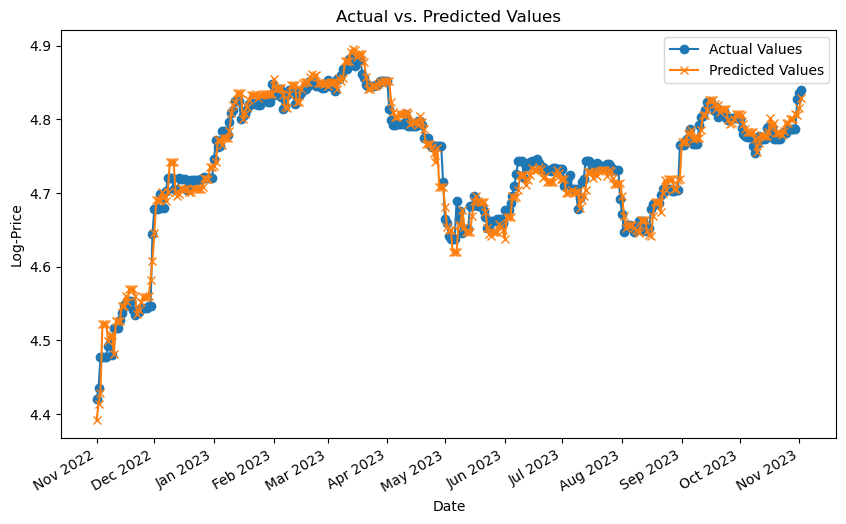

In [58]:
#Front-month

y_test_front_idx.index = pd.to_datetime(y_test_front_idx.index)

dates = y_test_front_idx.index
actual_values = y_test_front_idx['CLOSE_x']

plt.figure(figsize=(10, 6))
plt.plot(dates, actual_values, label='Actual Values', marker='o')
plt.plot(dates, y_pred_front, label='Predicted Values', marker='x')

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))


plt.xlabel('Date')
plt.ylabel('Log-Price')
plt.title('Actual vs. Predicted Values')
plt.legend()  

plt.gcf().autofmt_xdate()

plt.show()

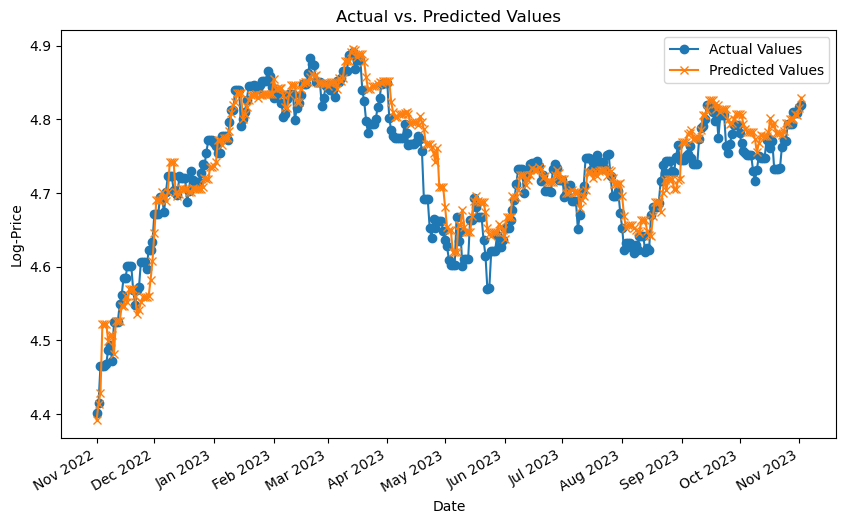

In [59]:
#Second-month

y_test_second_idx.index = pd.to_datetime(y_test_second_idx.index)

dates = y_test_second_idx.index
actual_values = y_test_second_idx['CLOSE_y']

plt.figure(figsize=(10, 6))
plt.plot(dates, actual_values, label='Actual Values', marker='o')
plt.plot(dates, y_pred_front, label='Predicted Values', marker='x')

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))


plt.xlabel('Date')
plt.ylabel('Log-Price')
plt.title('Actual vs. Predicted Values')
plt.legend()  

plt.gcf().autofmt_xdate()

plt.show()

# Random Forest - Restricted  <a class="anchor" id="rf-restricted"></a>

In [60]:
#Creating dfs on restricted features 
X_train_front_rf_restricted = X_train_front_rf[restricted_features_front]
X_test_front_rf_restricted = X_test_front_rf[restricted_features_front]
X_train_second_rf_restricted = X_train_second_rf[restricted_features_second]
X_test_second_rf_restricted = X_test_second_rf[restricted_features_second]

In [61]:
#Initialising RF models on restricted dfs
rf_front_restricted = RandomForestRegressor(random_state=42)
rf_front_restricted.fit(X_train_front_rf_restricted, y_train_front)

rf_second_restricted = RandomForestRegressor(random_state=42)
rf_second_restricted.fit(X_train_second_rf_restricted, y_train_second)

RandomForestRegressor(random_state=42)

In [62]:
#Predictions on train and test
y_train_pred_front_restricted = rf_front_restricted.predict(X_train_front_rf_restricted)
y_train_pred_second_restricted = rf_second_restricted.predict(X_train_second_rf_restricted)

y_test_pred_front_restricted = rf_front_restricted.predict(X_test_front_rf_restricted)
y_test_pred_second_restricted = rf_second_restricted.predict(X_test_second_rf_restricted)

In [63]:
#Evaluation

# Front dataset
train_mae_front_restricted = mean_absolute_error(y_train_front, y_train_pred_front_restricted)
train_rmse_front_restricted = np.sqrt(mean_squared_error(y_train_front, y_train_pred_front_restricted))
train_mape_front_restricted = custom_mape(y_train_front, y_train_pred_front_restricted)
train_r2_front_restricted = r2_score(y_train_front, y_train_pred_front_restricted)
train_adj_r2_front_restricted = adjusted_r2(train_r2_front_restricted, len(y_train_front), X_train_front_rf_restricted.shape[1])

test_mae_front_restricted = mean_absolute_error(y_test_front, y_test_pred_front_restricted)
test_rmse_front_restricted = np.sqrt(mean_squared_error(y_test_front, y_test_pred_front_restricted))
test_mape_front_restricted = custom_mape(y_test_front, y_test_pred_front_restricted)
test_r2_front_restricted = r2_score(y_test_front, y_test_pred_front_restricted)
test_adj_r2_front_restricted = adjusted_r2(test_r2_front_restricted, len(y_test_front), X_test_front_rf_restricted.shape[1])

results_front_restricted = {
    'Metric': ['MAE', 'RMSE', 'MAPE', 'R-squared', 'Adjusted R-squared'],
    'Train': [train_mae_front_restricted, train_rmse_front_restricted, train_mape_front_restricted, train_r2_front_restricted, train_adj_r2_front_restricted],
    'Test': [test_mae_front_restricted, test_rmse_front_restricted, test_mape_front_restricted, test_r2_front_restricted, test_adj_r2_front_restricted]
}

# Second-month dataset
train_mae_second_restricted = mean_absolute_error(y_train_second, y_train_pred_second_restricted)
train_rmse_second_restricted = np.sqrt(mean_squared_error(y_train_second, y_train_pred_second_restricted))
train_mape_second_restricted = custom_mape(y_train_second, y_train_pred_second_restricted)
train_r2_second_restricted = r2_score(y_train_second, y_train_pred_second_restricted)
train_adj_r2_second_restricted = adjusted_r2(train_r2_second_restricted, len(y_train_second), X_train_second_rf_restricted.shape[1])

test_mae_second_restricted = mean_absolute_error(y_test_second, y_test_pred_second_restricted)
test_rmse_second_restricted = np.sqrt(mean_squared_error(y_test_second, y_test_pred_second_restricted))
test_mape_second_restricted = custom_mape(y_test_second, y_test_pred_second_restricted)
test_r2_second_restricted = r2_score(y_test_second, y_test_pred_second_restricted)
test_adj_r2_second_restricted = adjusted_r2(test_r2_second_restricted, len(y_test_second), X_test_second_rf_restricted.shape[1])

results_second_restricted = {
    'Metric': ['MAE', 'RMSE', 'MAPE', 'R-squared', 'Adjusted R-squared'],
    'Train': [train_mae_second_restricted, train_rmse_second_restricted, train_mape_second_restricted, train_r2_second_restricted, train_adj_r2_second_restricted],
    'Test': [test_mae_second_restricted, test_rmse_second_restricted, test_mape_second_restricted, test_r2_second_restricted, test_adj_r2_second_restricted]
}

#Converting results to dataframes
rf_results_front_restricted = pd.DataFrame(results_front_restricted)
rf_results_second_restricted = pd.DataFrame(results_second_restricted)

## Hyperparameter Tuning

In [64]:
# Defining the hyperparameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initializing TS cross-validation
tscv = TimeSeriesSplit(n_splits=5)

# Performing grid search with cross-validation for Random Forest on residuals
grid_search_rf_front = GridSearchCV(rf_front_restricted, param_grid_rf, cv=tscv, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_rf_front.fit(X_train_front_rf_restricted, y_train_front)

grid_search_rf_second = GridSearchCV(rf_second_restricted, param_grid_rf, cv=tscv, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_rf_second.fit(X_train_second_rf_restricted, y_train_second)

# Storing the best Random Forest model 
best_rf_front_restricted = grid_search_rf_front.best_estimator_
best_rf_second_restricted = grid_search_rf_second.best_estimator_

In [65]:
# Predicting on the test set using the best Random Forest model
y_test_pred_front_restricted_tuned = best_rf_front_restricted.predict(X_test_front_rf_restricted)
y_test_pred_second_restricted_tuned = best_rf_second_restricted.predict(X_test_second_rf_restricted)

# Predicting on the train set using the best Random Forest model
y_train_pred_front_restricted_tuned = best_rf_front_restricted.predict(X_train_front_rf_restricted)
y_train_pred_second_restricted_tuned = best_rf_second_restricted.predict(X_train_second_rf_restricted)

#Evaluting the tuned model on the test set
tuned_test_mae_front_restricted = mean_absolute_error(y_test_front, y_test_pred_front_restricted_tuned)
tuned_test_rmse_front_restricted = np.sqrt(mean_squared_error(y_test_front, y_test_pred_front_restricted_tuned))
tuned_test_mape_front_restricted = custom_mape(y_test_front, y_test_pred_front_restricted_tuned)
tuned_test_r2_front_restricted = r2_score(y_test_front, y_test_pred_front_restricted_tuned)
tuned_test_adj_r2_front_restricted = adjusted_r2(tuned_test_r2_front_restricted, len(y_test_front), X_test_front_rf_restricted.shape[1])

tuned_test_mae_second_restricted = mean_absolute_error(y_test_second, y_test_pred_second_restricted_tuned)
tuned_test_rmse_second_restricted = np.sqrt(mean_squared_error(y_test_second, y_test_pred_second_restricted_tuned))
tuned_test_mape_second_restricted = custom_mape(y_test_second, y_test_pred_second_restricted_tuned)
tuned_test_r2_second_restricted = r2_score(y_test_second, y_test_pred_second_restricted_tuned)
tuned_test_adj_r2_second_restricted = adjusted_r2(tuned_test_r2_second_restricted, len(y_test_second), X_test_second_rf_restricted.shape[1])

# the final model on the train set
tuned_train_mae_front_restricted = mean_absolute_error(y_train_front, y_train_pred_front_restricted_tuned)
tuned_train_rmse_front_restricted = np.sqrt(mean_squared_error(y_train_front, y_train_pred_front_restricted_tuned))
tuned_train_mape_front_restricted = custom_mape(y_train_front, y_train_pred_front_restricted_tuned)
tuned_train_r2_front_restricted = r2_score(y_train_front, y_train_pred_front_restricted_tuned)
tuned_train_adj_r2_front_restricted = adjusted_r2(tuned_train_r2_front_restricted, len(y_train_front), X_train_front_rf_restricted.shape[1])

tuned_train_mae_second_restricted = mean_absolute_error(y_train_second, y_train_pred_second_restricted_tuned)
tuned_train_rmse_second_restricted = np.sqrt(mean_squared_error(y_train_second, y_train_pred_second_restricted_tuned))
tuned_train_mape_second_restricted = custom_mape(y_train_second, y_train_pred_second_restricted_tuned)
tuned_train_r2_second_restricted = r2_score(y_train_second, y_train_pred_second_restricted_tuned)
tuned_train_adj_r2_second_restricted = adjusted_r2(tuned_train_r2_second_restricted, len(y_train_second), X_train_second_rf_restricted.shape[1])

# Storing the tuned results
tuned_results_front_restricted = {
    'Metric': ['MAE', 'RMSE', 'MAPE', 'R-squared', 'Adjusted R-squared'],
    'Train': [tuned_train_mae_front_restricted, tuned_train_rmse_front_restricted, tuned_train_mape_front_restricted, tuned_train_r2_front_restricted, tuned_train_adj_r2_front_restricted],
    'Test': [tuned_test_mae_front_restricted, tuned_test_rmse_front_restricted, tuned_test_mape_front_restricted, tuned_test_r2_front_restricted, tuned_test_adj_r2_front_restricted]
}

tuned_results_second_restricted = {
    'Metric': ['MAE', 'RMSE', 'MAPE', 'R-squared', 'Adjusted R-squared'],
    'Train': [tuned_train_mae_second_restricted, tuned_train_rmse_second_restricted, tuned_train_mape_second_restricted, tuned_train_r2_second_restricted, tuned_train_adj_r2_second_restricted],
    'Test': [tuned_test_mae_second_restricted, tuned_test_rmse_second_restricted, tuned_test_mape_second_restricted, tuned_test_r2_second_restricted, tuned_test_adj_r2_second_restricted]
}

In [66]:
#Converting results to dataframes
rf_tuned_results_front_restricted = pd.DataFrame(tuned_results_front_restricted)
rf_tuned_results_second_restricted = pd.DataFrame(tuned_results_second_restricted)

### Actual vs. Predicted Plots 

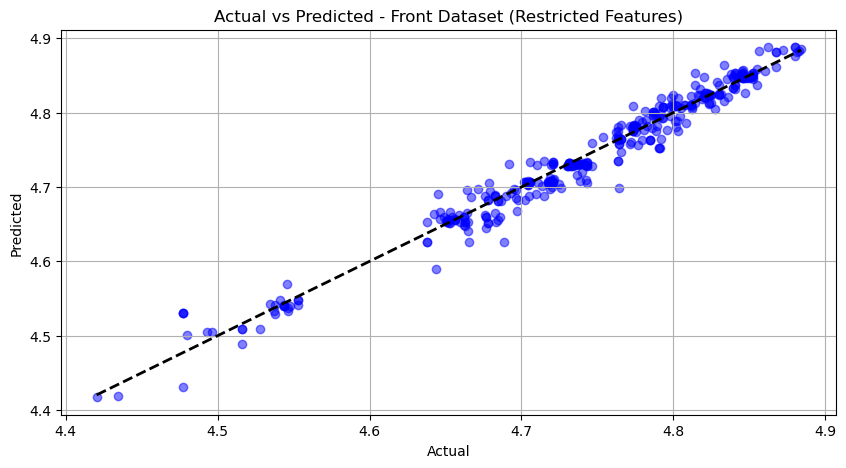

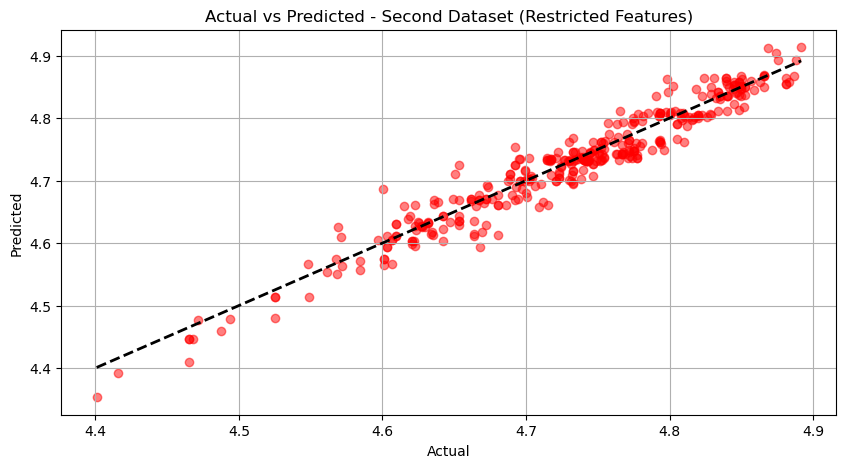

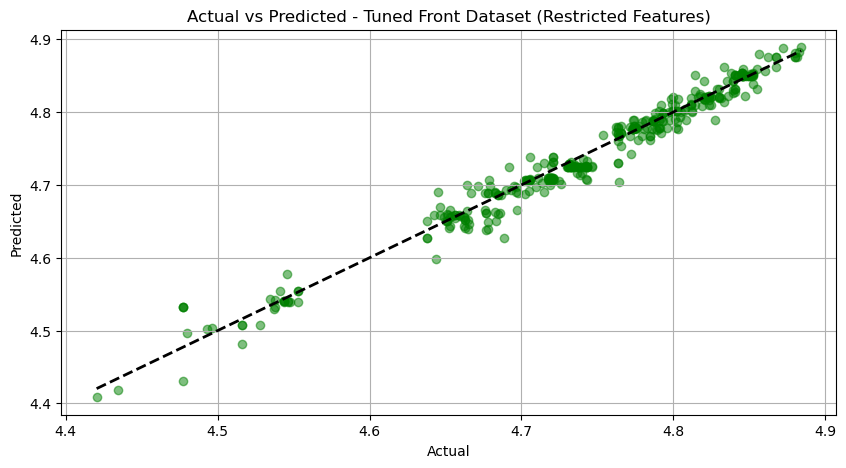

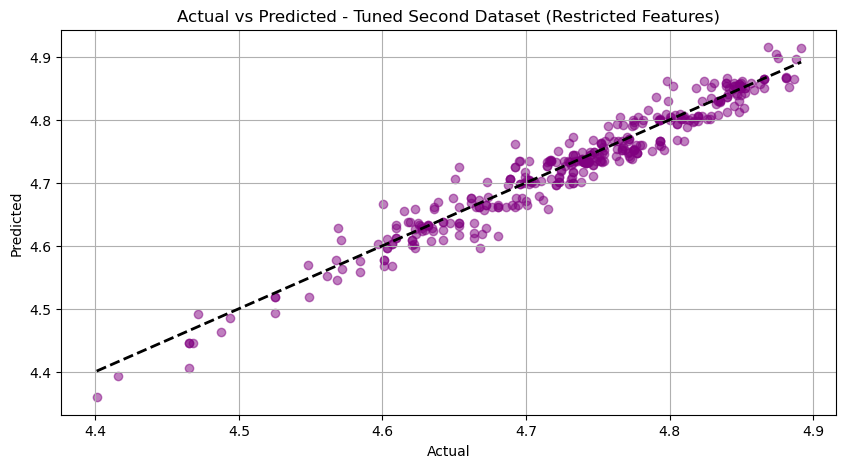

In [67]:
#Plotting Actual vs. Predicted for the front dataset
plt.figure(figsize=(10, 5))
plt.scatter(y_test_front, y_test_pred_front_restricted, color='blue', alpha=0.5)
plt.plot([y_test_front.min(), y_test_front.max()], [y_test_front.min(), y_test_front.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted - Front Dataset (Restricted Features)')
plt.grid(True)
plt.show()

#Plotting Actual vs. Predicted for the second dataset
plt.figure(figsize=(10, 5))
plt.scatter(y_test_second, y_test_pred_second_restricted, color='red', alpha=0.5)
plt.plot([y_test_second.min(), y_test_second.max()], [y_test_second.min(), y_test_second.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted - Second Dataset (Restricted Features)')
plt.grid(True)
plt.show()

#Plotting Actual vs. Predicted for the tuned model - front dataset
plt.figure(figsize=(10, 5))
plt.scatter(y_test_front, y_test_pred_front_restricted_tuned, color='green', alpha=0.5)
plt.plot([y_test_front.min(), y_test_front.max()], [y_test_front.min(), y_test_front.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted - Tuned Front Dataset (Restricted Features)')
plt.grid(True)
plt.show()

#Plotting Actual vs. Predicted for the tuned model - second dataset
plt.figure(figsize=(10, 5))
plt.scatter(y_test_second, y_test_pred_second_restricted_tuned, color='purple', alpha=0.5)
plt.plot([y_test_second.min(), y_test_second.max()], [y_test_second.min(), y_test_second.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted - Tuned Second Dataset (Restricted Features)')
plt.grid(True)
plt.show()

In [68]:
rf_results_second_restricted

,Metric,Train,Test
0,MAE,0.008397,0.018106
1,RMSE,0.012237,0.023293
2,MAPE,0.190304,0.383591
3,R-squared,0.999010,0.934644
4,Adjusted R-squared,0.999008,0.933739


In [69]:
rf_tuned_results_front_restricted

,Metric,Train,Test
0,MAE,0.008606,0.011096
1,RMSE,0.014968,0.015272
2,MAPE,0.194409,0.235179
3,R-squared,0.998504,0.971493
4,Adjusted R-squared,0.998501,0.971178


In [ ]:
#Saving results of unrestricted models
rf_pre_tuning_train_results_front.to_csv('rf_pre_tuning_train_results_front.csv', index=False)
rf_pre_tuning_train_results_second.to_csv('rf_pre_tuning_train_results_second.csv', index=False)
rf_pre_tuning_results_front.to_csv('rf_pre_tuning_results_front.csv', index=False)
rf_pre_tuning_results_second.to_csv('rf_pre_tuning_results_second.csv', index=False)

rf_front_train_results.to_csv('rf_front_train_results.csv', index=False)
rf_second_train_results.to_csv('rf_second_train_results.csv', index=False)
rf_front_results.to_csv('rf_tuned_front_test_results.csv', index=False)
rf_second_results.to_csv('rf_tuned_second_test_results.csv', index=False)

In [177]:
#Saving  results of restricted models
rf_results_front_restricted.to_csv('rf_results_front_restricted.csv', index=False)
rf_results_second_restricted.to_csv('rf_results_second_restricted.csv', index=False)

rf_tuned_results_front_restricted.to_csv('rf_tuned_results_front_restricted.csv', index=False)
rf_tuned_results_second_restricted.to_csv('rf_tuned_results_second_restricted.csv', index=False)